In [0]:
!pip install --upgrade watson-developer-cloud

    100% |████████████████████████████████| 225kB 4.9MB/s 
    100% |████████████████████████████████| 296kB 5.5MB/s 
    100% |████████████████████████████████| 3.1MB 7.3MB/s 
    100% |████████████████████████████████| 61kB 18.0MB/s 
    100% |████████████████████████████████| 153kB 16.0MB/s 
    100% |████████████████████████████████| 61kB 20.5MB/s 
    100% |████████████████████████████████| 2.1MB 12.0MB/s 


    100% |████████████████████████████████| 430kB 21.9MB/s 
    100% |████████████████████████████████| 102kB 22.9MB/s 
    100% |████████████████████████████████| 256kB 12.4MB/s 
  Running setup.py bdist_wheel for watson-developer-cloud ... - \ done
  Stored in directory: /content/.cache/pip/wheels/81/cd/de/4e0916f623c2d125502e493394fd333ed693960264d4b7e524
  Running setup.py bdist_wheel for Twisted ... - \ | / - \ | / - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/a9/85/24/fc82998fb686cb31e65a26c027a20120fd1219c9f1e925913a
  Running setup.py bdist_wheel for zope.interface ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/c6/b2/d2/be6785a207eaa58d76debc10c9d5c66196b40a88abb61d6af7
  Running setup.py bdist_wheel for pycparser ... - \ done
  Stored in directory: /content/.cache/pip/wheels/c0/a1/27/5ba234bd77ea5a290cbf6d675259ec52293193467a12ef1f46
Successfully built watson-developer-cloud Twisted zope.interface pyc

In [0]:
#import json
import pandas as pd
from watson_developer_cloud import NaturalLanguageUnderstandingV1

In [0]:
#Basic authentication
#Replace {username} and {password} with your service credentials. 

natural_language_understanding = NaturalLanguageUnderstandingV1(     
        username = '5d88f683-ff9a-4b87-95d2-d10771b2f761',
        password = 'IeG0s0dgtmda',
        version='2018-03-19')

In [0]:
from watson_developer_cloud.natural_language_understanding_v1 import Features, EmotionOptions, SentimentOptions

In [0]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving Sample_TMCase.csv to Sample_TMCase.csv


In [0]:
#CreateDataset
abc = pd.read_csv("Sample_TMCase.csv")

abc['sentiment_all'] = ''
abc['anger_all'] = ''
abc['sadness_all'] = ''
abc['fear_all'] = ''
abc['joy_all'] = ''
abc['disgust_all'] = ''
#

In [0]:
abc

,EID,itemid,comment101,itemid.1,comment49,itemid.2,comment73,itemid.3,comment177,itemid.4,...,comment138,itemid.16,comment162,EE Score,sentiment_all,anger_all,sadness_all,fear_all,joy_all,disgust_all
0,2204,101,NaN,49,NaN,73,NaN,177,NaN,4,...,NaN,162,NaN,4.75,positive,0.03013,0.252563,0.060878,0.633698,0.00964
1,2205,101,NaN,49,NaN,73,NaN,177,NaN,4,...,NaN,162,NaN,4.50,positive,0.013782,0.075459,0.046479,0.762776,0.018437
2,2209,101,NaN,49,NaN,73,NaN,177,NaN,4,...,NaN,162,NaN,4.00,positive,0.036196,0.085437,0.018028,0.77973,0.011915
3,2212,101,NaN,49,NaN,73,Leadership has shown some improvement in terms...,177,NaN,4,...,NaN,162,NaN,2.75,negative,0.062816,0.607511,0.0961,0.534236,0.03819
4,2223,101,NaN,49,NaN,73,The only improvements I feel could be made is ...,177,NaN,4,...,NaN,162,NaN,4.25,positive,0.025852,0.146463,0.00981,0.793033,0.003975
5,5109,101,NaN,49,NaN,73,NaN,177,because where I am looking to be promoted and ...,4,...,NaN,162,NaN,3.50,,,,,,
6,5366,101,NaN,49,NaN,73,The attendance policy that this company holds ...,177,There is always a possibility a better opportu...,4,...,NaN,162,NaN,3.00,,,,,,
7,5651,101,NaN,49,NaN,73,"Overall, it is a great place to work. Sometime...",177,NaN,4,...,NaN,162,NaN,4.25,,,,,,
8,2200,101,NaN,49,NaN,73,NaN,177,NaN,4,...,NaN,162,NaN,3.50,,,,,,
9,2202,101,NaN,49,NaN,73,It appears that external candidates are given ...,177,NaN,4,...,NaN,162,NaN,2.00,,,,,,


In [0]:
for i in range(0, 279):    
    text = str(abc['comment4'][i]) + str(abc['comment11'][i]) + str(abc['comment26'][i]) + str(abc['comment42'][i]) + str(abc['comment43'][i]) + str(abc['comment101'][i]) + str(abc['comment47'][i]) + str(abc['comment102'][i]) + str(abc['comment49'][i]) + str(abc['comment73'][i])
    text = text.replace("nan", "")
    text = text.replace("#NAME?", "")
    
    if text != "":
        try:
            response = natural_language_understanding.analyze(
                text = text,
                features=Features(emotion=EmotionOptions(), sentiment=SentimentOptions()))
            abc['sentiment_all'][i] = response['sentiment']['document']['label']
            abc['anger_all'][i] = response['emotion']['document']['emotion']['anger']
            abc['sadness_all'][i] = response['emotion']['document']['emotion']['sadness']
            abc['fear_all'][i] = response['emotion']['document']['emotion']['fear']
            abc['joy_all'][i] = response['emotion']['document']['emotion']['joy']
            abc['disgust_all'][i] = response['emotion']['document']['emotion']['disgust']
            print (i)
        except:
            print ('error')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14

0
1
2
3
4
6
7
8
9
10
11
13
14
15
16
17
18
19
20
22
23
24
25
26
27
28
error
30
31
32
33
34
35
36
37
38
39
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
error
65
error
67
68
69
70
71
73
75
76
error
error
81
84
85
86
87
88
89
90
91
92
93
94
95
96
98
99
100
101
error
103
104
error
107
108
109
111
112
115
116
118
120
122
124
125
126
127
128
129
130
132
133
134
135
136
137
138
139
141
error
144
145
146
148
149
151
152
153
155
156
157
158
159
161
162
163
164
165
166
167
168
error
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
190
191
192
193
194
195
196
error
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
226
227
228
229
230
231
232
233
235
236
237
238
240
241
242
245
246
247
248
249
250
251
252
253
254
255
256
257
258
260
261
262
263
264
266
267
268
269
270
error
272
273
276


277


In [0]:
abc.to_csv('Output4.csv')

In [0]:
abc.head(5)

,EID,itemid,comment101,itemid.1,comment49,itemid.2,comment73,itemid.3,comment177,itemid.4,...,comment138,itemid.16,comment162,EE Score,sentiment_all,anger_all,sadness_all,fear_all,joy_all,disgust_all
0,2204,101,NaN,49,NaN,73,NaN,177,NaN,4,...,NaN,162,NaN,4.75,positive,0.03013,0.252563,0.060878,0.633698,0.00964
1,2205,101,NaN,49,NaN,73,NaN,177,NaN,4,...,NaN,162,NaN,4.50,positive,0.013782,0.075459,0.046479,0.762776,0.018437
2,2209,101,NaN,49,NaN,73,NaN,177,NaN,4,...,NaN,162,NaN,4.00,positive,0.036196,0.085437,0.018028,0.77973,0.011915
3,2212,101,NaN,49,NaN,73,Leadership has shown some improvement in terms...,177,NaN,4,...,NaN,162,NaN,2.75,negative,0.062816,0.607511,0.0961,0.534236,0.03819
4,2223,101,NaN,49,NaN,73,The only improvements I feel could be made is ...,177,NaN,4,...,NaN,162,NaN,4.25,positive,0.025852,0.146463,0.00981,0.793033,0.003975


In [0]:
abc.describe()

,EID,itemid,itemid.1,itemid.2,itemid.3,itemid.4,comment4,itemid.5,comment11,itemid.6,...,itemid.9,itemid.10,itemid.11,itemid.12,itemid.13,itemid.14,itemid.15,itemid.16,comment162,EE Score
count,279.000000,279.0,279.0,279.0,279.0,279.0,0.0,279.0,0.0,279.0,...,279.0,279.0,279.0,279.0,279.0,279.0,279.0,279.0,0.0,279.000000
mean,14382.688172,101.0,49.0,73.0,177.0,4.0,NaN,11.0,NaN,26.0,...,102.0,47.0,130.0,132.0,134.0,136.0,138.0,162.0,NaN,3.764934
std,21832.717141,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.883177
min,2200.000000,101.0,49.0,73.0,177.0,4.0,NaN,11.0,NaN,26.0,...,102.0,47.0,130.0,132.0,134.0,136.0,138.0,162.0,NaN,1.000000
25%,3246.500000,101.0,49.0,73.0,177.0,4.0,NaN,11.0,NaN,26.0,...,102.0,47.0,130.0,132.0,134.0,136.0,138.0,162.0,NaN,3.250000
50%,4972.000000,101.0,49.0,73.0,177.0,4.0,NaN,11.0,NaN,26.0,...,102.0,47.0,130.0,132.0,134.0,136.0,138.0,162.0,NaN,3.750000
75%,6267.000000,101.0,49.0,73.0,177.0,4.0,NaN,11.0,NaN,26.0,...,102.0,47.0,130.0,132.0,134.0,136.0,138.0,162.0,NaN,4.500000
max,93244.000000,101.0,49.0,73.0,177.0,4.0,NaN,11.0,NaN,26.0,...,102.0,47.0,130.0,132.0,134.0,136.0,138.0,162.0,NaN,5.000000


In [0]:
mydata = abc[['EID', 'sentiment_all',	'anger_all',	'sadness_all',	'fear_all',	'joy_all',	'disgust_all']]
#abcEID sentiment_all	anger_all	sadness_all	fear_all	joy_all	disgust_all
mydata.head()

,EID,sentiment_all,anger_all,sadness_all,fear_all,joy_all,disgust_all
0,2204,positive,0.03013,0.252563,0.060878,0.633698,0.00964
1,2205,positive,0.013782,0.075459,0.046479,0.762776,0.018437
2,2209,positive,0.036196,0.085437,0.018028,0.77973,0.011915
3,2212,negative,0.062816,0.607511,0.0961,0.534236,0.03819
4,2223,positive,0.025852,0.146463,0.00981,0.793033,0.003975


In [0]:
mydata['sentiment_all'].value_counts()

positive    140
negative     68
             48
neutral      23
Name: sentiment_all, dtype: int64

In [0]:
m2 = mydata.loc[ mydata['sentiment_all'] == 'positive']
m2.head()

,EID,sentiment_all,anger_all,sadness_all,fear_all,joy_all,disgust_all
0,2204,positive,0.03013,0.252563,0.060878,0.633698,0.00964
1,2205,positive,0.013782,0.075459,0.046479,0.762776,0.018437
2,2209,positive,0.036196,0.085437,0.018028,0.77973,0.011915
4,2223,positive,0.025852,0.146463,0.00981,0.793033,0.003975
7,5651,positive,0.008039,0.277361,0.027908,0.660547,0.004727


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


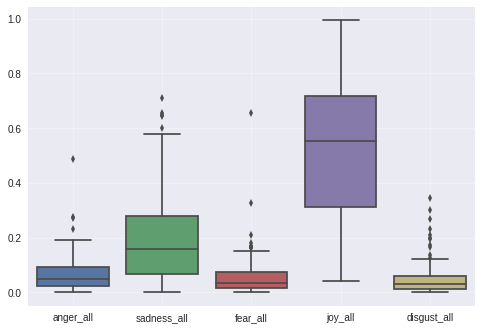

In [0]:
import seaborn as sns

sns.boxplot(data=m2[['anger_all','sadness_all', 'fear_all',	'joy_all',	'disgust_all' ]])

plt.grid(alpha=0.3)
plt.show()

In [0]:
m3 = mydata.loc[ mydata['sentiment_all'] == 'negative']
m3.head()

,EID,sentiment_all,anger_all,sadness_all,fear_all,joy_all,disgust_all
3,2212,negative,0.062816,0.607511,0.0961,0.534236,0.03819
6,5366,negative,0.318403,0.141185,0.677706,0.005075,0.119841
9,2202,negative,0.083511,0.201183,0.086174,0.494582,0.075707
11,2221,negative,0.154537,0.232839,0.107678,0.53463,0.074996
13,2244,negative,0.121712,0.609483,0.12508,0.210764,0.099251


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


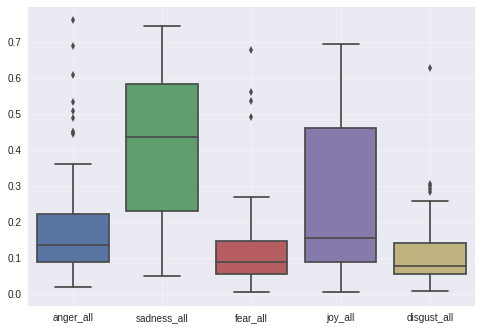

In [0]:
sns.boxplot(data=m3[['anger_all','sadness_all', 'fear_all',	'joy_all',	'disgust_all' ]])

plt.grid(alpha=0.3)
plt.show()

In [0]:
m4 = mydata.loc[ mydata['sentiment_all'] == 'neutral']
m5 = m4.loc[(m4['anger_all'] != '')]
m5.head(20)

,EID,sentiment_all,anger_all,sadness_all,fear_all,joy_all,disgust_all
25,5095,neutral,0.020456,0.03647,0.018729,0.766517,0.01431
46,3715,neutral,0.153495,0.120241,0.131844,0.391314,0.044243
47,3807,neutral,0.230938,0.071163,0.17562,0.038321,0.165278
49,4204,neutral,0.063892,0.235909,0.235758,0.072589,0.083266
60,6208,neutral,0.112619,0.301015,0.020738,0.46244,0.168395
69,5143,neutral,0.015109,0.143809,0.009087,0.556285,0.020771
70,5470,neutral,0.075694,0.409917,0.377317,0.05718,0.091057
89,2626,neutral,0.078788,0.130839,0.056415,0.213122,0.133118
99,6153,neutral,0.051907,0.096796,0.032958,0.380228,0.121693
109,4913,neutral,0.043183,0.758901,0.105797,0.081517,0.027644


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


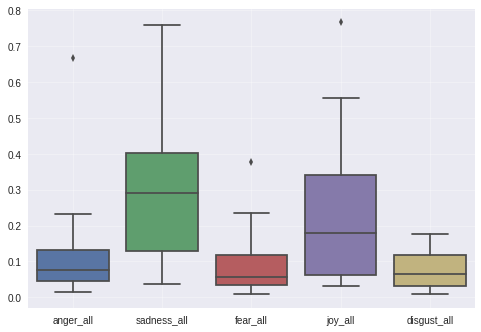

In [0]:
sns.boxplot(data=m5[['anger_all','sadness_all', 'fear_all',	'joy_all',	'disgust_all' ]])

plt.grid(alpha=0.3)
plt.show()

TypeError: ignored

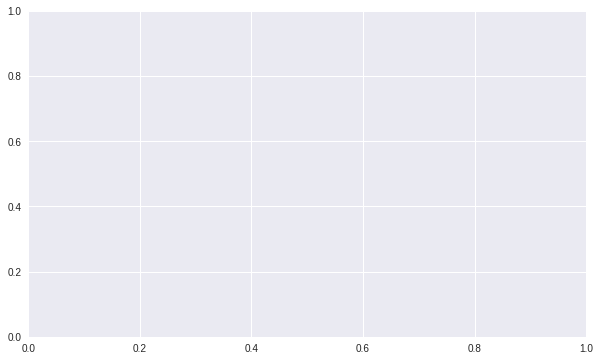

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.boxplot( mydata.disgust_all, mydata.sentiment_all)

plt.grid(alpha=0.3)
plt.show()
